# Titanic Dataset

## Framing the problem

1. Issue is a binary classification task using supervised learning as label outcomes are only "survived" or "not survived" with our predictive model
2. Using PR Curve for performance metric as more people died than survived on Titanic, thus is an imbalanced scenario.
3. Using cross validation to test the performance of our mdoel

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
train_data = pd.read_csv('data/titanic/train.csv')
test_data = pd.read_csv('data/titanic/test.csv')

In [188]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
train_data.set_index('PassengerId', inplace=True)
test_data.set_index('PassengerId', inplace=True)

In [190]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [191]:
train_data.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [192]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [193]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [194]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [195]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [196]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [197]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

num_pipeline=Pipeline(steps=[(
    'imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())
    ])

cat_pipeline=Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder()), 
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])


In [198]:
from sklearn.compose import ColumnTransformer

num_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Pclass', 'Sex', 'Embarked']

preprocess_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

In [199]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-0.5924806 ,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.63878901,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.2846632 , -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.2846632 , -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.17706291, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [200]:
Y_train = train_data['Survived']

In [201]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [202]:
from sklearn.model_selection import cross_val_score

rfc_scores = cross_val_score(rf_classifier, X_train, Y_train, cv=5, scoring='roc_auc')
rfc_scores.mean()

print(f"Average prediction score is correct : {round(rfc_scores.mean()*100, 2)}%")


Average prediction score is correct : 85.76%


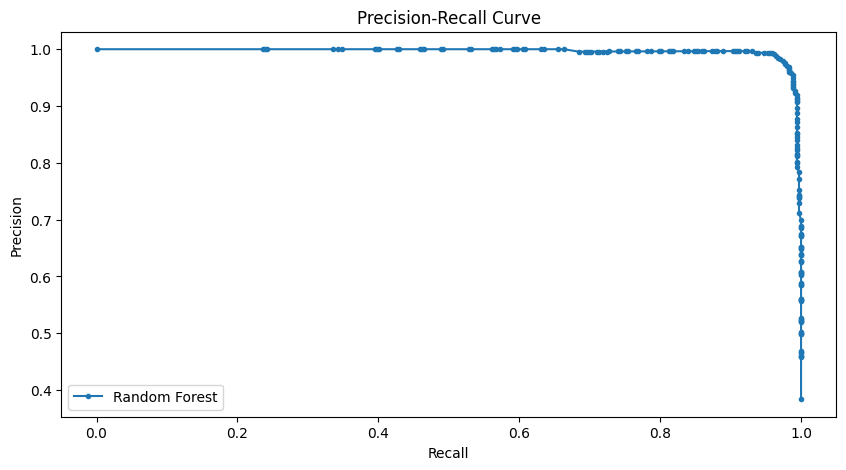

In [203]:
from sklearn.metrics import precision_recall_curve

y_scores = rf_classifier.predict_proba(X_train)
y_scores = y_scores[:, 1]

precision, recall, thresholds = precision_recall_curve(Y_train, y_scores)

plt.figure(figsize=(10, 5))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [204]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [205]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20, 30, 40],
    'min_samples_split': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)


{'max_depth': 20, 'min_samples_split': 20, 'n_estimators': 400}


In [206]:
param_grid = {
    'n_estimators': [400,600,800],
    'max_depth': [20, 30, 40],
    'min_samples_split': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

{'max_depth': 30, 'min_samples_split': 20, 'n_estimators': 600}


In [207]:
#apply best parameters to new model
rfc_best = RandomForestClassifier(n_estimators=400, max_depth=20, min_samples_split=20)
rfc_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, min_samples_split=20, n_estimators=400)

In [208]:
rfc_best_scores = cross_val_score(rfc_best, X_train, Y_train, cv=10, scoring='roc_auc')
rfc_best_scores.mean()

print(f"Average prediction score is correct : {round(rfc_best_scores.mean()*100, 2)}%")

Average prediction score is correct : 87.66%


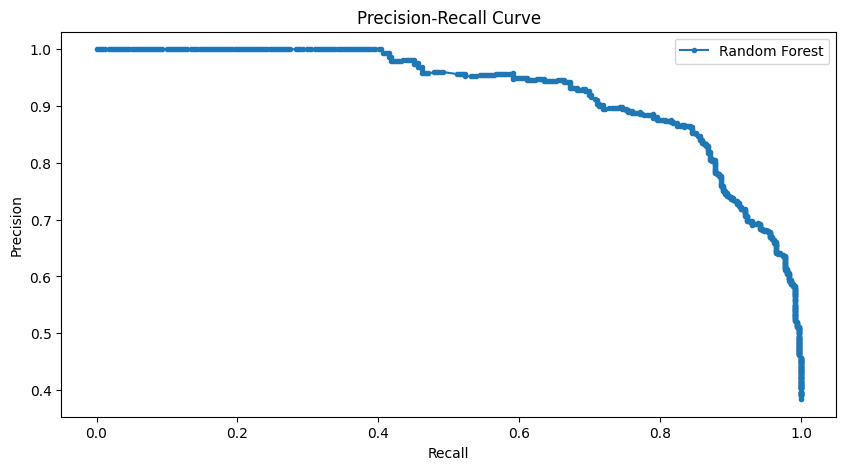

In [209]:
#plot the PR curve for the best model
y_scores = rfc_best.predict_proba(X_train)
y_scores = y_scores[:, 1]

precision, recall, thresholds = precision_recall_curve(Y_train, y_scores)

plt.figure(figsize=(10, 5))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Apply rf_classifier to test data
X_test = preprocess_pipeline.transform(test_data)

y_pred = rf_classifier.predict(X_test)

#create a CSV file with passengerId and Survived columns
test_data['Survived'] = y_pred
test_data.to_csv('data/titanic/test_predictions.csv', index=False)
